<a href="https://colab.research.google.com/github/dogakusun/Pusula_Do-aMelek_K-s-n/blob/main/Pusula_Do%C4%9FaMelek_K%C3%BCs%C3%BCn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
#1. Veri Seti Yükleme
df=pd.read_excel("Talent_Academy_Case_DT_2025.xlsx")

In [ ]:
#2. Veri Görüntüleme
df

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika
2231,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika


In [ ]:
#3.Veri Setinin ilk 5 Satırı
df.head()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
0,145134,60,Kadın,0 Rh+,Türkiye,"Becker Musküler Distrofisi, Hiportiroidizm, Ka...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",TOZ,Ayak bileği ve ayağın yüzeysel yaralanması,Ayak Bileği,5 Seans,Ayak Bileği,20 Dakika
1,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,20 Dakika
2,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika
3,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,Boyun,5 Dakika
4,145135,28,Erkek,0 Rh+,Türkiye,"Duchenne Musküler Distrofisi, Myastenia gravis...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",NaN,"Omuzun darbe sendromu,DORSALJİ, DİĞER, SERVİKO...",Dorsalji -Boyun+trapez+skapular,15 Seans,"Boyun,Sırt",20 Dakika


In [ ]:
#4.Veri Setinin Son 5 Satırı
df.tail()

,HastaNo,Yas,Cinsiyet,KanGrubu,Uyruk,KronikHastalik,Bolum,Alerji,Tanilar,TedaviAdi,TedaviSuresi,UygulamaYerleri,UygulamaSuresi
2230,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,10 Dakika
2231,145536,48,Erkek,NaN,Türkiye,"Aritmi, Myastenia gravis, Fascioscapulohumeral...","Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi","ARVELES,CORASPIN",Eklemin kontraktürü,Ekstansör tendon Rehabilitasyon,15 Seans,Sol El Bilek Bölgesi,20 Dakika
2232,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,​Algonörodistrofi,​ ay...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,20 Dakika
2233,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,15 Dakika
2234,145537,33,Kadın,A Rh+,Türkiye,NaN,"Fiziksel Tıp Ve Rehabilitasyon,Solunum Merkezi",Sucuk,"Aşil tendon yaralanması,Algonörodistrofi, ayak...",Aşil Rüptürü Rehabilitasyonu,15 Seans,Sol Ayak Bileği Bölgesi,5 Dakika


In [ ]:
#5. Veri Tipleri
df.dtypes

,0
HastaNo,int64
Yas,int64
Cinsiyet,object
KanGrubu,object
Uyruk,object
KronikHastalik,object
Bolum,object
Alerji,object
Tanilar,object
TedaviAdi,object


In [ ]:
#6. Veri Setindeki Sutünlar
df.columns

Index(['HastaNo', 'Yas', 'Cinsiyet', 'KanGrubu', 'Uyruk', 'KronikHastalik',
       'Bolum', 'Alerji', 'Tanilar', 'TedaviAdi', 'TedaviSuresi',
       'UygulamaYerleri', 'UygulamaSuresi'],
      dtype='object')

In [ ]:
#7. DataFrame içindeki Eksik Değerler
df.isnull().sum()

,0
HastaNo,0
Yas,0
Cinsiyet,169
KanGrubu,675
Uyruk,0
KronikHastalik,611
Bolum,11
Alerji,944
Tanilar,75
TedaviAdi,0


<Axes: >

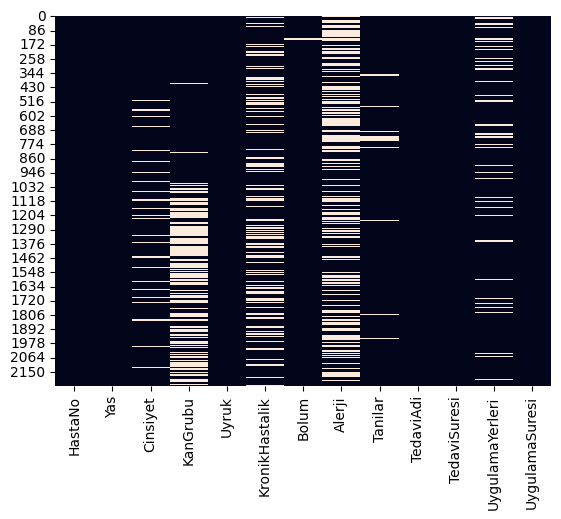

In [ ]:
#8. DataFrame içindeki eksik değerlerin ısı haritası ile görselleştirilmesi
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
#9.DataFrame’in satır ve sütun sayısı
df.shape

(2235, 13)

In [ ]:
#10.DataFrame hakkında özet bilgi
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2235 entries, 0 to 2234
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   HastaNo          2235 non-null   int64  
 1   Yas              2235 non-null   int64  
 2   Cinsiyet         2066 non-null   object 
 3   KanGrubu         1560 non-null   object 
 4   Uyruk            2235 non-null   object 
 5   KronikHastalik   1624 non-null   object 
 6   Bolum            2224 non-null   object 
 7   Alerji           1291 non-null   object 
 8   Tanilar          2160 non-null   object 
 9   TedaviAdi        2235 non-null   object 
 10  TedaviSuresi     2235 non-null   float64
 11  UygulamaYerleri  2014 non-null   object 
 12  UygulamaSuresi   2235 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 227.1+ KB


In [ ]:
#11. Eksik değer işlemleri, kategorik verilerin sayısallaştırılması ve normalizasyon için sınıfların içe aktarılması
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [ ]:
#12.Hedef değişken dönüşümü
df["TedaviSuresi"] = pd.to_numeric(df["TedaviSuresi"].astype(str).str.extract(r"(\d+)")[0], errors="coerce")


In [ ]:
# 13. UygulamaSuresi'ni dakikaya çevirme
df["UygulamaSuresi"] = pd.to_numeric(
    df["UygulamaSuresi"].astype(str).str.extract(r'(\d+)')[0],
    errors='coerce'
)


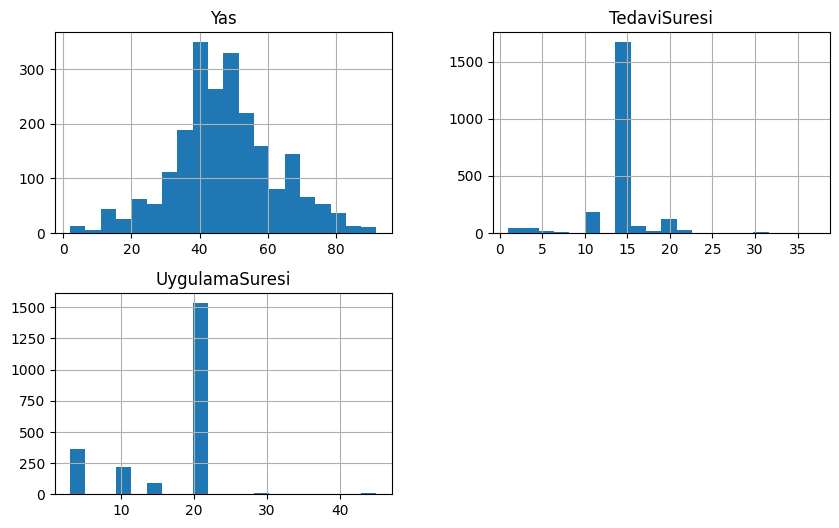

In [ ]:
#14. Sayısal Sütunları Görselleştirme
num_cols = ["Yas", "TedaviSuresi", "UygulamaSuresi"]
df[num_cols].hist(figsize=(10,6), bins=20)
plt.show()

In [ ]:
# 15. Eksik değer doldurma
# Cinsiyet, KanGrubu, KronikHastalik, Alerji, Tanilar, UygulamaYerleri kategorik
cat_cols = ["Cinsiyet", "KanGrubu", "KronikHastalik", "Alerji", "Tanilar", "UygulamaYerleri", "Bolum", "Uyruk"]

In [ ]:
# Sayısal eksikler
num_imputer = KNNImputer(n_neighbors=5)
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [ ]:
# 16. Encoding (OneHot + Label)
# OneHot kategorik -> KanGrubu, Cinsiyet, Uyruk, Bolum
df = pd.get_dummies(df, columns=["Cinsiyet", "KanGrubu", "Uyruk", "Bolum"], drop_first=True)

In [ ]:
# Label Encoding çok değerli metinler -> KronikHastalik, Alerji, Tanilar, UygulamaYerleri
for col in ["KronikHastalik", "Alerji", "Tanilar", "UygulamaYerleri"]:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
# 17. Sayısal değişkenleri ölçekleme
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [ ]:
# 18. Hedef değişken ve özellikler
X = df.drop(columns=["TedaviSuresi", "HastaNo"])
y = df["TedaviSuresi"]


print("Hazır veri seti boyutu:", X.shape, y.shape)

Hazır veri seti boyutu: (2235, 28) (2235,)


<Axes: >

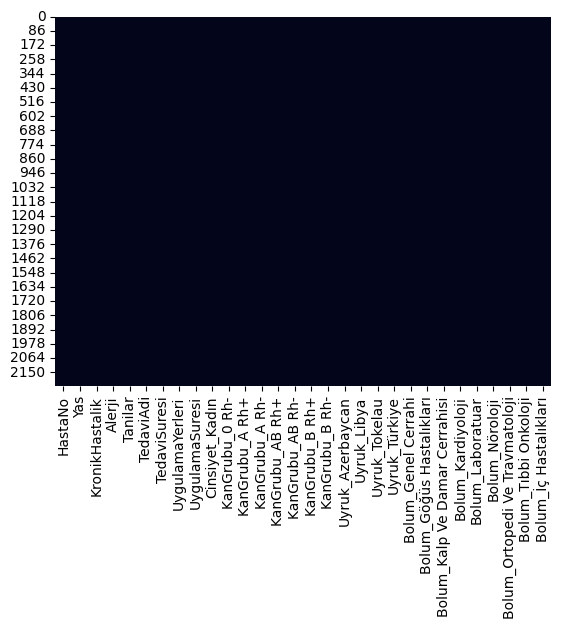

In [ ]:
# 19.Eksik değerleri doldurulmuş modele hazır veri setinin ısı haritası
sns.heatmap(df.isnull(), cbar=False)